# Práctica 7: Vecinos más cercanos.

- Grupo 1:
    - Jesús María Matos Torres.
    - Carlos Santana Esplá

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestCentroid
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

## Ejercicio 1: Clasificación por vecinos más cercanos

In [2]:
df=pd.read_csv('./datos practicas/Aprendizaje-Automatico-I-main/Practica 7/precio_casas_clasificacion.csv', sep=';')
x = df.iloc[:,0:9]
y = df.iloc[:,9]
x = x.to_numpy()
y = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    print("Tasa de acierto para ", i, "vecinos: ", accuracy_score(y_test, y_pred))

Tasa de acierto para  1 vecinos:  0.395671834625323
Tasa de acierto para  2 vecinos:  0.3835594315245478
Tasa de acierto para  3 vecinos:  0.3916343669250646
Tasa de acierto para  4 vecinos:  0.3888888888888889
Tasa de acierto para  5 vecinos:  0.40132428940568476
Tasa de acierto para  6 vecinos:  0.4010012919896641
Tasa de acierto para  7 vecinos:  0.3997093023255814
Tasa de acierto para  8 vecinos:  0.4021317829457364
Tasa de acierto para  9 vecinos:  0.40455426356589147
Tasa de acierto para  10 vecinos:  0.40616925064599485
Tasa de acierto para  11 vecinos:  0.40568475452196384
Tasa de acierto para  12 vecinos:  0.4043927648578811
Tasa de acierto para  13 vecinos:  0.4081072351421189
Tasa de acierto para  14 vecinos:  0.4039082687338501
Tasa de acierto para  15 vecinos:  0.40358527131782945
Tasa de acierto para  16 vecinos:  0.4027777777777778
Tasa de acierto para  17 vecinos:  0.4047157622739018
Tasa de acierto para  18 vecinos:  0.40988372093023256
Tasa de acierto para  19 vecinos

- En este primer apartado, analizamos la tasa de acierto en función del numero de vecinos sin escalar los valores y como el ejercicio demuestra, la tasa de acierto es bastante baja en este caso, ya que no supera el 50% en ningún caso.

In [3]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train2 = scaler.transform(x_train)
x_test2 = scaler.transform(x_test)

for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train2, y_train)
    y_pred = neigh.predict(x_test2)
    print("Tasa de acierto para ", i, "vecinos escalado: ", accuracy_score(y_test, y_pred))

Tasa de acierto para  1 vecinos escalado:  0.9287790697674418
Tasa de acierto para  2 vecinos escalado:  0.9211886304909561
Tasa de acierto para  3 vecinos escalado:  0.9400839793281653
Tasa de acierto para  4 vecinos escalado:  0.935562015503876
Tasa de acierto para  5 vecinos escalado:  0.9446059431524548
Tasa de acierto para  6 vecinos escalado:  0.9378229974160207
Tasa de acierto para  7 vecinos escalado:  0.9457364341085271
Tasa de acierto para  8 vecinos escalado:  0.9408914728682171
Tasa de acierto para  9 vecinos escalado:  0.9446059431524548
Tasa de acierto para  10 vecinos escalado:  0.940406976744186
Tasa de acierto para  11 vecinos escalado:  0.9446059431524548
Tasa de acierto para  12 vecinos escalado:  0.940406976744186
Tasa de acierto para  13 vecinos escalado:  0.9431524547803618
Tasa de acierto para  14 vecinos escalado:  0.9392764857881137
Tasa de acierto para  15 vecinos escalado:  0.9410529715762274
Tasa de acierto para  16 vecinos escalado:  0.9383074935400517
Tasa

- Sin embargo, una vez escalados los valores, la tasa de acierto mejora en gran cantidad, superando siempre el 90% de tasa de acierto.

In [4]:
inicio = time.time()
for j in range(3):
    for i in range(1,21):
        neigh = KNeighborsClassifier(n_neighbors=i, algorithm='ball_tree')
        neigh.fit(x_train2, y_train)
        y_pred = neigh.predict(x_test2)
        accuracy_score(y_test, y_pred)
fin = time.time()
        
inicio2 = time.time()
for j in range(3):
    for i in range(1,21):
        neigh = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree')
        neigh.fit(x_train2, y_train)
        y_pred = neigh.predict(x_test2)
        accuracy_score(y_test, y_pred)
fin2 = time.time()
        
inicio3 = time.time()
for j in range(3):
    for i in range(1,21):
        neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
        neigh.fit(x_train2, y_train)
        y_pred = neigh.predict(x_test2)
        accuracy_score(y_test, y_pred)
fin3 = time.time()

print("Tiempo transcurrido en el algoritmo ball_tree: {:.3f} seg.".format(fin - inicio))
print("Tiempo transcurrido en el algoritmo kd_tree: {:.3f} seg.".format(fin2 - inicio2))
print("Tiempo transcurrido en el algoritmo brute: {:.3f} seg.".format(fin3 - inicio3))

Tiempo transcurrido en el algoritmo ball_tree: 86.077 seg.
Tiempo transcurrido en el algoritmo kd_tree: 43.781 seg.
Tiempo transcurrido en el algoritmo brute: 164.689 seg.


- Como se puede observar, el algoritmo con el mejor tiempo de respuesta es el algoritmo kd_tree. Además, también podemos afirmar que el algoritmo brute, conlleva un tiempo de respuesta muy elevado comparado con los otros dos.

In [5]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_train2, y_train, test_size=0.2, train_size=0.8)
lis = []
w = ['uniform', 'distance']
actual = 0

for i in range(1,21):
    for j in range(len(w)):
        neigh = KNeighborsClassifier(n_neighbors=i, weights=w[j])
        neigh.fit(x_train3, y_train3)
        y_pred3 = neigh.predict(x_test3)
        nuevo = accuracy_score(y_test3, y_pred3)
        if nuevo > actual:
            actual = nuevo
            we = w[j]
            ne = i
            
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train2, y_train)
    y_pred = neigh.predict(x_test2)
    lis.append(accuracy_score(y_test, y_pred))

print("La mejor combinación encontrada es con vecino", ne, "y weight", we, "con tasa de acierto de", actual) 
print("El valor mayor de la tasa de acierto del apartado 3 es", max(lis))

La mejor combinación encontrada es con vecino 15 y weight distance con tasa de acierto de 0.9512110726643599
El valor mayor de la tasa de acierto del apartado 3 es 0.9457364341085271


- Como se puede observar, si modificamos los datos de entrenamiento a 80% de entrenamiento y un 20% para los datos de prueba, la tasa de acierto mejora, aunque esta mejora no es muy notable, es decir, la tasa de acierto no mejora en gran cantidad comparada con la tasa de acierto del apartado 3.

## Ejercicio 2: Implementación del clasificador por centroide más próximo.

In [25]:
class CentroideMasProximo:
    
    def __init__(self):
        self.centroides = []
        self.tag = []
    
    def ajustar(self, x_train, y_train):
        self.tag = np.unique(y_train)
        for c in self.tag:
            self.centroides.append(x_train[y_train == c].mean(axis=0))
    
    def predecir(self, x_test):
        dis = np.zeros((len(x_test),len(self.centroides)))
        for i in range(len(x_test)):
            for j in range(len(self.centroides)):
                dis[i,j] = np.linalg.norm(x_test[i]-self.centroides[j])
        
        return self.tag[dis.argmin(axis=1)]

    
x = df.iloc[:,0:9]
y = df.iloc[:,9]
x = x.to_numpy()
y = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)
centroi = CentroideMasProximo()
centroi.ajustar(x_train, y_train)
y_predecir = centroi.predecir(x_test)

- Implementamos nuestra clase, donde el método ajustar, transforma el dataset con el algoritmo dado en el enunciado de la práctica y el método predecir, que halla los datos después del ajuste.

In [26]:
clf = NearestCentroid().fit(x_train, y_train)
y_pred_near = clf.predict(x_test)

- Predecimos los datos con la función dada por sklearn, NearestCentroid.

Gráfica comparativa entre los resultados conocido y los predichos a través de nuestra clase


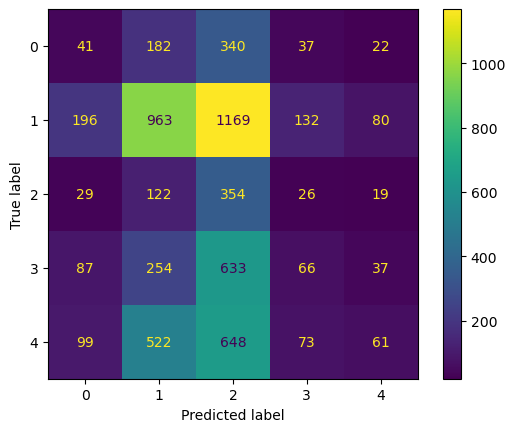

Gráfica comparativa entre los resultados conocido y los predichos a través de la clase NearestCentroid


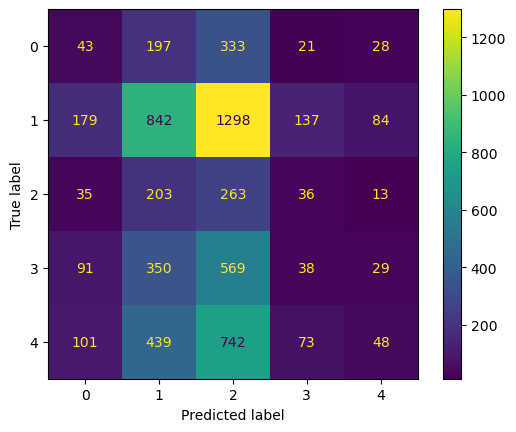

In [24]:
cm = confusion_matrix(y_test, y_predecir)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print("Gráfica comparativa entre los resultados conocido y los predichos a través de nuestra clase.")                             
disp.plot()
plt.show()

cm = confusion_matrix(y_test, y_pred_near)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print("Gráfica comparativa entre los resultados conocido y los predichos a través de la clase NearestCentroid.")                                                     
disp.plot()
plt.show()